In [71]:
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean, median, variance 
plt.rcParams['figure.figsize'] = [10, 5]
import pprint

def get_data_from_file(file_name):
    utilizations = []
    line_no = 0
        
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            line[len(line)-1] = line[len(line)-1].replace('\r', '').replace('\n', '')
            line_no = line_no + 1
            if line_no == 1:
                edges = line
            else: 
                utilizations.append([float(u) for u in line[1:]])   
    
    edges_data = {}
    for i in range(len(edges)):
        utilizations_of_edge = []
        for utilization in utilizations:
            utilizations_of_edge.append(utilization[i])
        edges_data[edges[i]] = utilizations_of_edge
    
    return edges_data, edges

utilization_altruistic, edges = get_data_from_file("results/edges_a0_b1.csv")

utilization_altruistic_means = {}
utilization_altruistic_means[1] = {}
utilization_altruistic_means[2] = {}
utilization_altruistic_means[3] = {}

utilization_all_edges = {}
utilization_all_edges[1] = {}
utilization_all_edges[2] = {}
utilization_all_edges[3] = {}

for key, value in utilization_altruistic.iteritems():
    utilization_altruistic_means[1][key]= mean(value[0:100])
    utilization_altruistic_means[2][key]= mean(value[100:200])
    utilization_altruistic_means[3][key]= mean(value[200:300])
    
    utilization_all_edges[1][key]= value[0:100]
    utilization_all_edges[2][key]= value[100:200]
    utilization_all_edges[3][key]= value[200:300]
    
pp = pprint.PrettyPrinter(depth=4)
pp.pprint("gneE99: " + str(utilization_altruistic_means[1]["gneE99"]))
pp.pprint("gneE99: " + str(utilization_altruistic_means[2]["gneE99"]))
pp.pprint("gneE99: " + str(utilization_altruistic_means[3]["gneE99"]))

'gneE99: 0.0'
'gneE99: 0.0114573785518'
'gneE99: 0.0114573785518'


In [72]:
result = []

with open("results/plans_a0_b1/global-response.csv", 'r') as results:
    for i, line in enumerate(results):
        if i == 40:
            result = line.split(",")[2:]

result1 = result[0:1131]
result2 = result[1131:2262]
result3 = result[2262:3393]

assert len(result1) == 1131
assert len(result2) == 1131
assert len(result3) == 1131

global_response1 = {}
global_response2 = {}
global_response3 = {}

i = 0
for e in edges: 
    global_response1[e] = result1[i]
    global_response2[e] = result2[i]
    global_response3[e] = result3[i]
    i += 1 

print "loaded global response"

loaded global response


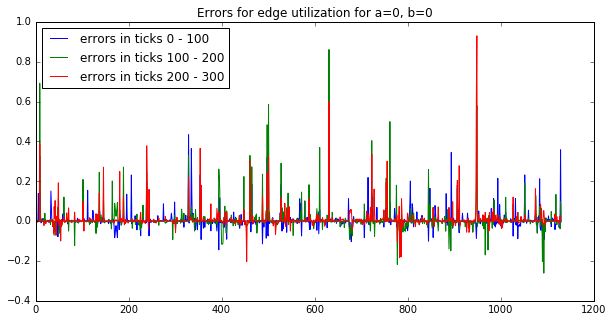

0.00444429878262
0.00804943979563
0.00968827812615
339300
variance: 0.00700667361832


In [73]:
errors1 = {}
errors2 = {}
errors3 = {}

for key, value in utilization_altruistic_means[1].iteritems():
    errors1[key] = value - float(global_response1[key])

for key, value in utilization_altruistic_means[2].iteritems():
    errors2[key] = value - float(global_response2[key])

for key, value in utilization_altruistic_means[3].iteritems():
    errors3[key] = value - float(global_response3[key])

# pp.pprint(errors1)

plt.plot(errors1.values(), label="errors in ticks 0 - 100")
plt.plot(errors2.values(), label="errors in ticks 100 - 200")
plt.plot(errors3.values(), label="errors in ticks 200 - 300")

plt.legend(loc='best')
plt.title('Errors for edge utilization for a=0, b=0')
plt.show()

print(mean(errors1.values()))
print(mean(errors2.values()))
print(mean(errors3.values()))

all_utilizations = []
all_utilizations += utilization_altruistic_means[1].values()
all_utilizations += utilization_altruistic_means[2].values()
all_utilizations += utilization_altruistic_means[3].values()

all_utilizations_all_edges = []
for e in utilization_all_edges[1].values():
    for i in e: 
        all_utilizations_all_edges.append(i)

for e in utilization_all_edges[2].values():
    for i in e: 
        all_utilizations_all_edges.append(i)
        
for e in utilization_all_edges[3].values():
    for i in e: 
        all_utilizations_all_edges.append(i)

print len(all_utilizations_all_edges)
print "variance: " + str(variance(all_utilizations_all_edges))